# Z-Score

In [1]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

**z–value**, also known as **z-score**, is a measure of standard deviations. it measures how many standard deviations the observed value is away from the mean in a normal distribution.

We’ll look up the z-score in a **z-table**, which is a table that takes the number of standard deviations and tells us the percentage of the area under the curve up to that point.

A z-score is unusual if it’s further than three standard deviations from the mean.  
Essentially the z-score tells us the percentile rank of the data point that we started with.

**Z-score** is standardized and does not take units, measurement scales etc in consideration.

It defines a point between standard variations located by an initial value ($\mu$) increased/decreased by a scale ($\sigma$)

---

## Resources

[Understanding z-scores - Brandon Foltz - YouTube Video](https://youtu.be/bUu5HIHIrRw)

https://courses.lumenlearning.com/introstats1/chapter/using-the-normal-distribution/

.

## Examples

<span style="font-size:large;color:blue">
The mean finishing time for male speed skaters at the winter Olympics on the 500 meter track is 70.42 seconds,
with a standard deviation of 0.34 seconds (the data is normally distributed).   

What is the maximum time a skater can post if he wants to skate faster than 95% of his competitors?
</span>

In [15]:
# meand and std
mu, sigma = 70.42, 0.34

In [22]:
# z-score at 5% of point
z = stats.norm.ppf(.05)
z

-1.6448536269514729

This athlete wants to be faster than 95 % of the event’s participants, which means he wants his time to be in the fastest 5 % . 

as the time decreases, chance to win increases, so we wish to stay in the negative tail...

$Z = $$x-\mu \over \sigma$

In [60]:
# fastest 5%
Z=stats.norm.ppf(q=.05, loc=mu, scale=sigma)
Z

69.8607497668365

if the skater’s time is 69.859 seconds or faster, he’ll be within the fastest 5 % of finishers in the event.

In [52]:
# grab 100 numbers between 1% and 99% quantiles
x = np.linspace(stats.norm.ppf(q=.01, loc=mu, scale=sigma),
                stats.norm.ppf(q=.99, loc=mu, scale=sigma), 100)

# PDF for the distribution
y = stats.norm.pdf(x=x, loc=mu, scale=sigma)

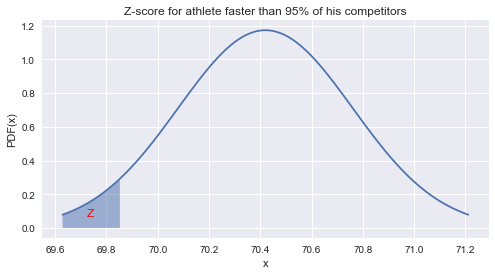

In [92]:
fig, ax = plt.subplots(figsize=(8,4))

ax.fill_between(x,y,where=(x<Z), alpha=.5)
ax.text(0.1,0.1,"Z", fontsize=12, transform=ax.transAxes, color='r')

ax.set_title('Z-score for athlete faster than 95% of his competitors')
ax.set_ylabel('PDF(x)'); ax.set_xlabel('x')

ax.plot(x,y); plt.show();

.

<span style="font-size:large;color:blue;font-weight:bold">
    The final exam scores in a statistics class were normally distributed with a mean of 63 and a standard deviation of 5.
</span>

$\mu=63$, $\sigma=5$

In [100]:
# mean and std
mu, sigma = 63,5

<span style="font-size:large;color:blue">
the probability that a randomly selected student scored more than 65 on the exam.
</span>

In [102]:
# survival function => SF = 1-CDF
stats.norm.sf(x=65, loc=mu, scale=sigma)

0.3445782583896758

There is 34.45% probability to score >65

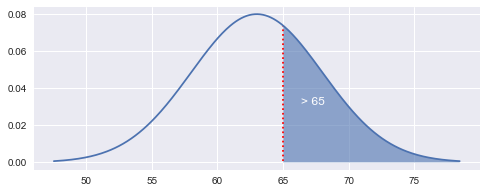

In [142]:
# grab 300 scores between 1% and 99% quantiles
x = np.linspace(stats.norm.ppf(q=.001, loc=mu, scale=sigma),
                stats.norm.ppf(q=.999, loc=mu, scale=sigma), 300)
# PDF of each random score
y = stats.norm.pdf(loc=mu, scale=sigma, x=x)

# prepare for plot
fig, ax = plt.subplots(figsize=(8,3))

# vertical line through the score 65
ax.vlines(x=65, ymin=np.min(y), ymax=stats.norm.pdf(65,mu,sigma), linestyles='dotted', colors='r')

# fill the porbability area >65
ax.fill_between(x,y, where=(x>65), alpha=0.6)
ax.text(0.6,0.4, "> 65", transform=ax.transAxes, color='w', fontsize=12)

# plot
ax.plot(x,y);plt.show();

.

<span style="font-size:large;color:blue">
the probability that a randomly selected student scored less than 85.
</span>

In [144]:
# CDF = < 85
stats.norm.cdf(85,mu,sigma)

0.9999945874560923

scoring less than 85 is almost 100%

.

<span style="font-size:large;color:blue">
the 90th percentile (that is, find the score k that has 90% of the scores below k and 10% of the scores above k).
</span>

In [145]:
#PPF
stats.norm.ppf(.9, mu, sigma)

69.407757827723

around 69.4 points is the 90th percentile

.

<span style="font-size:large;color:blue">
the 70th percentile (that is, find the score k such that 70% of scores are below k and 30% of the scores are above k).
</span>

In [146]:
#PPF
stats.norm.ppf(.7, mu, sigma)

65.6220025635402

.